In [30]:
# Dependencies and Setup
import pandas as pd
import numpy as np
from sqlalchemy import create_engine

In [4]:
# File to Load
Friday_deals_data= "data/BlackFriday_train.csv"

## Read the data
deals_data = pd.read_csv(Friday_deals_data)
deals_data=pd.DataFrame(deals_data)
deals_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1004023,P00000142,F,36-45,9,C,1,1,3,4.0,5.0,8390
1,1000876,P00114342,M,26-35,4,B,1,0,1,8.0,17.0,15496
2,1003881,P00239842,M,18-25,2,B,1,1,5,8.0,NaN,5152
3,1003504,P00255842,M,18-25,7,B,1,0,16,NaN,NaN,16318
4,1000846,P00319142,M,26-35,5,C,3,1,5,14.0,NaN,5270
5,1000549,P00332442,M,26-35,6,A,3,0,16,NaN,NaN,16455
6,1003539,P00092242,F,26-35,4,A,1,1,5,8.0,NaN,5452
7,1001605,P00219842,F,18-25,0,B,1,0,5,NaN,NaN,5377
8,1005365,P00053842,M,18-25,12,C,0,0,4,5.0,12.0,2138
9,1003563,P00117742,M,26-35,2,A,3,0,8,NaN,NaN,7825


In [5]:
print(deals_data.nunique())

User_ID                        5891
Product_ID                     3610
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               17
Product_Category_3               15
Purchase                      17759
dtype: int64


In [6]:
#Dropping the NaN values
#deals_data.dropna(how='NaN')
deals_data.dropna(inplace=True)
deals_data


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1004023,P00000142,F,36-45,9,C,1,1,3,4.0,5.0,8390
1,1000876,P00114342,M,26-35,4,B,1,0,1,8.0,17.0,15496
8,1005365,P00053842,M,18-25,12,C,0,0,4,5.0,12.0,2138
13,1000285,P00108542,F,36-45,0,A,1,0,5,8.0,14.0,8663
14,1001373,P00196042,F,26-35,1,A,1,0,4,9.0,15.0,2846
18,1003075,P00057742,F,26-35,11,C,2,1,2,8.0,18.0,13318
21,1003641,P00046742,M,26-35,0,B,1,0,1,2.0,15.0,15455
25,1004004,P00063342,M,51-55,0,C,1,1,1,2.0,9.0,15628
29,1000245,P00066542,M,36-45,16,B,0,0,1,15.0,16.0,4031
31,1003399,P00243942,M,26-35,4,C,1,0,1,2.0,15.0,11979


In [59]:
# Cleaning and filtering the csv files
deals_data.Stay_In_Current_City_Years=deals_data.Stay_In_Current_City_Years.replace({"4+":"4"})    

In [60]:
#creating the dataframe
deals_new_data=pd.DataFrame(deals_data)
deals_new_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1004023,P00000142,F,36-45,9,C,1,1,3,4.0,5.0,8390
1,1000876,P00114342,M,26-35,4,B,1,0,1,8.0,17.0,15496
8,1005365,P00053842,M,18-25,12,C,0,0,4,5.0,12.0,2138
13,1000285,P00108542,F,36-45,0,A,1,0,5,8.0,14.0,8663
14,1001373,P00196042,F,26-35,1,A,1,0,4,9.0,15.0,2846
18,1003075,P00057742,F,26-35,11,C,2,1,2,8.0,18.0,13318
21,1003641,P00046742,M,26-35,0,B,1,0,1,2.0,15.0,15455
25,1004004,P00063342,M,51-55,0,C,1,1,1,2.0,9.0,15628
29,1000245,P00066542,M,36-45,16,B,0,0,1,15.0,16.0,4031
31,1003399,P00243942,M,26-35,4,C,1,0,1,2.0,15.0,11979


In [61]:
deals_new_data=deals_new_data.rename(columns={"User_ID":"user_id","Product_ID":"product_id","Gender":"gender","Age":"age","Occupation":"occupation",
                                              "City_Category":"city_category","Stay_In_Current_City_Years":"stay_in_current_city_years",
                                             "Marital_Status":"marital_status","Product_Category_1":"product_category_1","Product_Category_2":"product_category_2",
                                             "Product_Category_3":"product_category_3","Purchase":"purchase"})
deals_new_data

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1004023,P00000142,F,36-45,9,C,1,1,3,4.0,5.0,8390
1,1000876,P00114342,M,26-35,4,B,1,0,1,8.0,17.0,15496
8,1005365,P00053842,M,18-25,12,C,0,0,4,5.0,12.0,2138
13,1000285,P00108542,F,36-45,0,A,1,0,5,8.0,14.0,8663
14,1001373,P00196042,F,26-35,1,A,1,0,4,9.0,15.0,2846
18,1003075,P00057742,F,26-35,11,C,2,1,2,8.0,18.0,13318
21,1003641,P00046742,M,26-35,0,B,1,0,1,2.0,15.0,15455
25,1004004,P00063342,M,51-55,0,C,1,1,1,2.0,9.0,15628
29,1000245,P00066542,M,36-45,16,B,0,0,1,15.0,16.0,4031
31,1003399,P00243942,M,26-35,4,C,1,0,1,2.0,15.0,11979


In [62]:
#calculate the data based on age and gender
gender_data = deals_new_data.groupby(['age','gender'])['gender'].count()
gender_data

age    gender
0-17   F          1408
       M          2912
18-25  F          6280
       M         21586
26-35  F         12046
       M         47204
36-45  F          7009
       M         22663
46-50  F          3213
       M          8546
51-55  F          2259
       M          7673
55+    F          1119
       M          4018
Name: gender, dtype: int64

In [63]:
#count the City category
print(deals_new_data.city_category.value_counts())

B    61367
C    49784
A    36785
Name: city_category, dtype: int64


In [64]:
#Total purchase by Male and female(gender category)

print("Total purchase by male and female is \n",deals_new_data.groupby('gender')['purchase'].sum())

#Total purchase by City Category
print(deals_new_data.groupby('city_category')['purchase'].sum())

Total purchase by male and female is 
 gender
F     369734305
M    1355524075
Name: purchase, dtype: int64
city_category
A    411759365
B    705402272
C    608096743
Name: purchase, dtype: int64


In [65]:
#Sum of purchase based on Gender and city_category
print(deals_new_data.groupby(['gender','city_category'])['purchase'].sum())

gender  city_category
F       A                 88491878
        B                150841916
        C                130400511
M       A                323267487
        B                554560356
        C                477696232
Name: purchase, dtype: int64


In [113]:
#Calculating the purchase count based on marital status, city category and purchase
deals_new_data.groupby(['marital_status','city_category','gender'])['purchase'].count().unstack(level = 'city_category')

city_category              A      B      C
marital_status gender                     
0              F        5067   8410   6189
               M       18096  28074  22558
1              F        3056   5521   5091
               M       10566  19362  15946

city_category           A          B          C
marital_status                                 
0               259881028  419243419  349951885
1               151878337  286158853  258144858


(array([0, 1]), <a list of 2 Text xticklabel objects>)

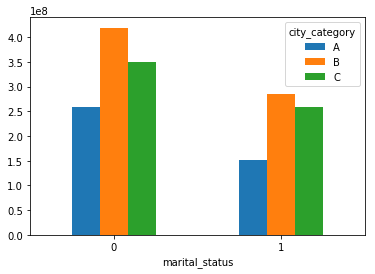

In [114]:
#Plotting the graph based on marital status , citycategory Vs purchase.
purchase_marital = deals_new_data.groupby(['marital_status','city_category'])['purchase'].sum().unstack(level = 
                                                                                'city_category')
print(purchase_marital)
purchase_marital.plot(kind = 'bar')
plt.xticks(rotation = 0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

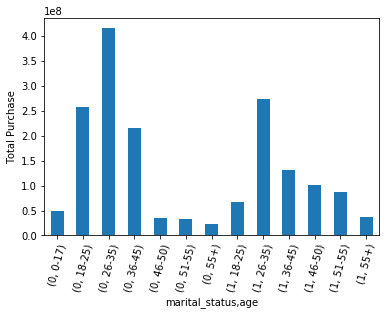

In [115]:
#Analysis on how marital status plays a role on different features of the data
deals_new_data.groupby(['marital_status','age'])['purchase'].sum().plot(kind = 'bar')
plt.ylabel('Total Purchase')
plt.xticks(rotation = 75)

In [67]:
#convert the dataframe to csv
deals_new_data.to_csv('data/project2.csv', index=False)

# #LOAD

In [71]:
#Connect to local database
connection_string = "postgres:sanasahel@localhost:5432/BlackFriday"
engine = create_engine(f'postgresql://{connection_string}')

In [72]:
#Check for tables
engine.table_names()

['blackfriday']

In [73]:
#Use pandas to load csv converted DataFrame into database
deals_new_data.to_sql(name='blackfriday', con=engine, if_exists='append', index=False)